In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [6]:
# Read data and remove nan and irrelevant columns
df = pd.read_csv("./Data/2018/LCS/NA LCS 2018 Spring Playoffs - Team Stats - OraclesElixir.csv")
data = df.drop(['STL', 'Player', 'Team', 'Pos', 'D%P15'], axis = 1)
df.head()

,Player,Team,Pos,GP,W%,CTR%,K,D,A,KDA,...,CS%P15,DPM,DMG%,D%P15,EGPM,GOLD%,STL,WPM,CWPM,WCPM
0,Adrian,Echo Fox,Support,7,57%,71%,1,17,39,2.4,...,4.0%,164,8.2%,NaN,111,9.1%,NaN,1.30,0.41,0.21
1,Altec,Echo Fox,ADC,7,57%,57%,15,15,18,2.2,...,27.9%,504,23.9%,NaN,274,23.2%,NaN,0.38,0.09,0.28
2,aphromoo,100 Thieves,Support,8,38%,63%,1,18,37,2.1,...,4.9%,130,8.2%,NaN,97,8.9%,NaN,1.10,0.40,0.29
3,Apollo,Clutch Gaming,ADC,12,42%,58%,27,16,50,4.8,...,29.4%,561,31.3%,NaN,272,26.3%,NaN,0.46,0.17,0.31
4,Bjergsen,TSM,Middle,4,25%,75%,8,3,12,6.7,...,29.8%,546,32.3%,NaN,281,27.3%,NaN,0.47,0.21,0.25


In [5]:
# Convert percents to decimal form
for col in data:
    if data.dtypes[col] == 'object':
        data[col] = data[col].astype(str).str[:-1].astype('float') / 100.0
data.head()

,GP,W%,CTR%,K,D,A,KDA,KP,KS%,DTH%,...,CSD10,CSPM,CS%P15,DPM,DMG%,EGPM,GOLD%,WPM,CWPM,WCPM
0,7,0.57,0.71,1,17,39,2.4,0.556,0.014,0.202,...,-4.6,1.3,0.040,164,0.082,111,0.091,1.30,0.41,0.21
1,7,0.57,0.57,15,15,18,2.2,0.458,0.208,0.179,...,1.7,9.5,0.279,504,0.239,274,0.232,0.38,0.09,0.28
2,8,0.38,0.63,1,18,37,2.1,0.623,0.016,0.228,...,5.3,1.6,0.049,130,0.082,97,0.089,1.10,0.40,0.29
3,12,0.42,0.58,27,16,50,4.8,0.740,0.260,0.142,...,-2.9,9.5,0.294,561,0.313,272,0.263,0.46,0.17,0.31
4,4,0.25,0.75,8,3,12,6.7,0.870,0.348,0.061,...,3.0,10.3,0.298,546,0.323,281,0.273,0.47,0.21,0.25


In [6]:
# SKLearn PCA process derived from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

# Get features and remove target
features = list(data.columns)
features.remove('W%') 
# Separating out the features
x = data.loc[:, features].values 
# Separating out the target
y = data.loc[:,['W%']].values 
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [14]:
# Run PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
# Create dataframe containing components and target
finalDf = pd.concat([principalDf, df[['W%']]], axis = 1)

In [52]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.41372453 0.15967724]


In [37]:
list(set(finalDf.get('W%')))

['90%', '25%', '42%', '57%', '38%', '0%']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

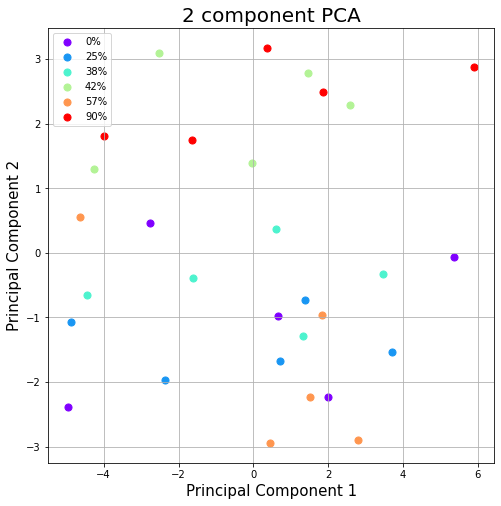

In [50]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = list(set(finalDf.get('W%')))
targets.sort()
colors = iter(cm.rainbow(np.linspace(0, 1, len(targets))))
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['W%'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()